<a href="https://colab.research.google.com/github/mclarafreitas/Topicos-Avancados-em-Informatica-I/blob/main/Atividade%20MLP%20(Multilayer%20Perceptron).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aluna: Maria Clara Moura de Freitas**
**Matrícula: 20200069048**

  Na atividade foi pedido para se realizar um treinamento MLP com o conjunto de dados "diabetes" que foi lido a partir de um arquivo CSV disponibilizado no github pelo professor. Primeiramente foi lido o arquivo CSV utilizando 'head' e 'describe' e dividimos as variáveis do conjunto de dados com entrada (X) e saída(y).

  Foi utilizado os dados:
*   Insulin, Glucose e Age (X)
*   Outcome (y)


  Depois dividimos as variáveis X e y em conjuntos de treinamento utilizando a função 'train_test_split' da biblioteca scikit-learn. Em seguida, normalizamos usando o 'MinMaxScaler' para evitar que uma variável tenha mais peso do que outra.
  Em seguida, criamos o modelo de aprendizagem usando a biblioteca TensorFlow que é uma rede neural simples contendo uma camada de entrada, escondida e uma de saída. Foi compilado com o otimizador 'adam', a função de perda 'binary_crossentropy' e utilizando o método 'fit' para treinar.

  * Foi colocado três Inputs na rede neural
  * 4 unidades na rede neural


  Depois de treinar o modelo, o conjunto de teste é usado para fazer previsões usando o método 'predict'. As previsão são convertidas em binário, então 1 é quando a previsão for maior que 0.5 e 0 caso menor que 0.5. A acurácia do modelo foi avaliada usando a função 'accuracy_score' e a matriz de confusão é gerada usando a biblioteca scikit-learn.

*   A acurácia encontrada foi de 73.95833333333334 %
*   Foram utilizados 81 Epochs
*   Tentei utilizar outra quantidade de Epochs e na maioria das vezes a acurácia foi menor e como foi dito em sala de aula que 81 Epochs é um número bom então manti esse valor.

E por fim, os resultados do modelo são plotados usando a biblioteca matplotlib. Um gráfico de dispersão foi plotado com os dados do treinamento e um gráfico de contorno para mostrar a região de decisão da rede neural.




In [ ]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/diabetes.csv")
dataset.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = dataset.loc[:,['Insulin', 'Glucose', 'Age' ]].values
y = dataset['Outcome'].values
print(X[0:10])
print(y[0:10])

[[  0 148  50]
 [  0  85  31]
 [  0 183  32]
 [ 94  89  21]
 [168 137  33]
 [  0 116  30]
 [ 88  78  26]
 [  0 115  29]
 [543 197  53]
 [  0 125  54]]
[1 0 1 0 1 0 1 0 1 1]


In [ ]:
dataset['Insulin'].values

array([  0,   0,   0,  94, 168,   0,  88,   0, 543,   0,   0,   0,   0,
       846, 175,   0, 230,   0,  83,  96, 235,   0,   0,   0, 146, 115,
         0, 140, 110,   0,   0, 245,  54,   0,   0, 192,   0,   0,   0,
       207,  70,   0,   0, 240,   0,   0,   0,   0,   0,   0,  82,  36,
        23, 300, 342,   0, 304, 110,   0, 142,   0,   0,   0, 128,   0,
         0,   0,   0,  38, 100,  90, 140,   0, 270,   0,   0,   0,   0,
         0,   0,   0,   0,  71,   0,   0, 125,   0,  71, 110,   0,   0,
       176,  48,   0,  64, 228,   0,  76,  64, 220,   0,   0,   0,  40,
         0, 152,   0, 140,  18,  36, 135, 495,  37,   0, 175,   0,   0,
         0,   0,  51, 100,   0, 100,   0,   0,  99, 135,  94, 145,   0,
       168,   0, 225,   0,  49, 140,  50,  92,   0, 325,   0,   0,  63,
         0, 284,   0,   0, 119,   0,   0, 204,   0, 155, 485,   0,   0,
        94, 135,  53, 114,   0, 105, 285,   0,   0, 156,   0,   0,   0,
        78,   0, 130,   0,  48,  55, 130,   0, 130,   0,   0,   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 3, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [ ]:
# Montando a Rede 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 81)

Epoch 1/81
576/576 [==============================] - 3s 3ms/step - loss: 0.6837 - accuracy: 0.6302
Epoch 2/81
576/576 [==============================] - 2s 3ms/step - loss: 0.6657 - accuracy: 0.6424
Epoch 3/81
576/576 [==============================] - 2s 4ms/step - loss: 0.6557 - accuracy: 0.6424
Epoch 4/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6471 - accuracy: 0.6424
Epoch 5/81
576/576 [==============================] - 1s 1ms/step - loss: 0.6384 - accuracy: 0.6424
Epoch 6/81
576/576 [==============================] - 1s 1ms/step - loss: 0.6295 - accuracy: 0.6458
Epoch 7/81
576/576 [==============================] - 1s 1ms/step - loss: 0.6214 - accuracy: 0.6562
Epoch 8/81
576/576 [==============================] - 1s 1ms/step - loss: 0.6134 - accuracy: 0.6458
Epoch 9/81
576/576 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6493
Epoch 10/81
576/576 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6649

In [ ]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

6/6 [==============================] - 0s 2ms/step
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.85549414]
 [0.18718955]
 [0.09050956]
 [0.78958404]
 [0.24234696]
 [0.0912405 ]
 [0.5951246 ]
 [0.845742  ]
 [0.3336744 ]
 [0.3047284 ]
 [0.6186628 ]
 [0.8930672 ]
 [0.40118366]
 [0.0907911 ]
 [0.09572351]
 [0.22750032]
 [0.8048886 ]
 [0.08708096]
 [0.5955793 ]
 [0.17011891]
 [0.5454973 ]
 [0.24350986]
 [0.10514107]
 [0.0963743 ]
 [0.13637526]
 [0.2850316 ]
 [0.18441963]
 [0.63739836]
 [0.21849468]
 [0.23150615]
 [0.56205064]
 [0.1548354 ]
 [0.17524508]
 [0.30852732]
 [0.26491216]]


In [ ]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [ ]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [ ]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  73.95833333333334 %


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)

Matrix de confusão: 
[[113  17]
 [ 33  29]]


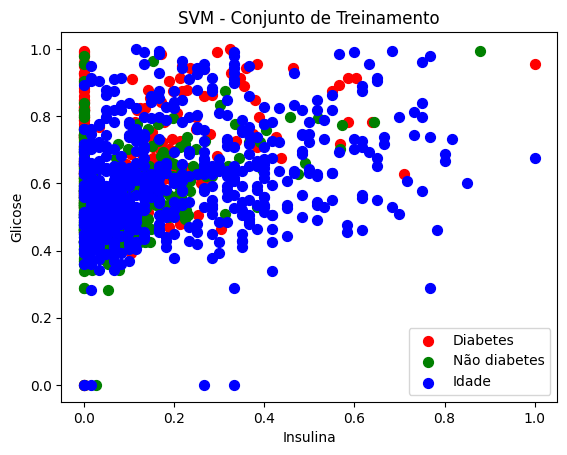

In [ ]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (sem diabetes)
insulin_neg = X_train[y_train == 0, 0]
glucose_neg = X_train[y_train == 0, 1]
insulin_pos = X_train[y_train == 1, 0]
glucose_pos = X_train[y_train == 1, 1]
age_neg = X_train[y_train == 0, 2] # nova variável age para os dados negativos
age_pos = X_train[y_train == 1, 2] # nova variável age para os dados positivos

plt.scatter(insulin_pos, glucose_pos, s=50, color='red', label='Diabetes')
plt.scatter(insulin_neg, glucose_neg, s=50, color='green', label='Não diabetes')
plt.scatter(age_pos, glucose_pos, s=50, color='blue', label='Idade') # scatterplot com age e glucose
plt.scatter(age_neg, glucose_neg, s=50, color='blue')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Insulina')
plt.ylabel('Glicose')
plt.legend()
plt.show()

76/76 [==============================] - 0s 1ms/step


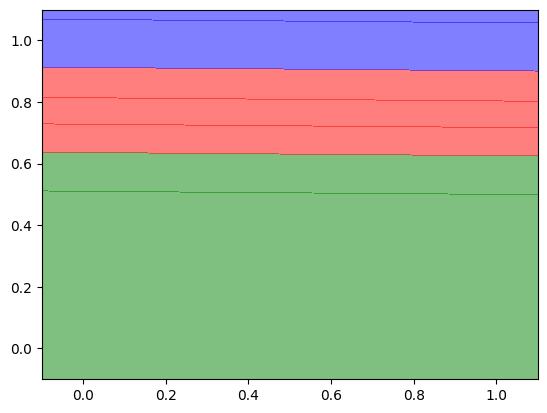

In [ ]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx, vy)

y_pred_mesh = classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).T).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red', 'blue')))

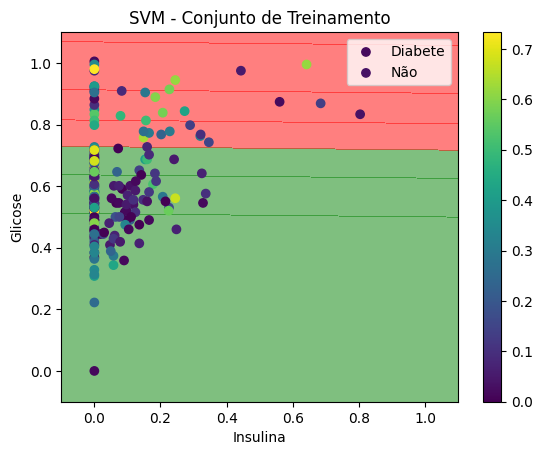

In [ ]:
insulin_neg = X_test[y_test == 0, 0]
glucose_neg = X_test[y_test == 0, 1]
age_neg = X_test[y_test == 0, 2]
insulin_pos = X_test[y_test == 1, 0]
glucose_pos = X_test[y_test == 1, 1]
age_pos = X_test[y_test == 1, 2]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(insulin_pos,glucose_pos, c=age_pos, cmap='viridis', label = 'Diabete')
plt.scatter(insulin_neg,glucose_neg, c=age_neg, cmap='viridis', label = 'Não')

plt.colorbar()
plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Insulina')
plt.ylabel('Glicose')
plt.legend()
plt.show()

In [ ]:
y_pred_mesh[30:35,40:45]

array([[0.33487445, 0.33528218, 0.33569002, 0.33609822, 0.33650655],
       [0.3752505 , 0.3756795 , 0.37610874, 0.37653822, 0.37696782],
       [0.41743922, 0.41788423, 0.41832936, 0.41877466, 0.41922   ],
       [0.46087214, 0.46132684, 0.4617816 , 0.46223634, 0.4626912 ],
       [0.50490755, 0.50536484, 0.5058222 , 0.50627947, 0.50673693]],
      dtype=float32)

Nesse código, primeiramente, o conjunto de dados sobre diabetes é lido a partir de um arquivo CSV e exibido usando o método 'head' e 'describe'. Em seguida, o conjunto de dados é dividido em variáveis de entrada e saída, X e y, respectivamente.

A seguir, as variáveis X e y são divididas em conjuntos de treinamento e teste usando a função 'train_test_split' da biblioteca scikit-learn. Os dados são normalizados usando o 'MinMaxScaler' para evitar que uma variável tenha mais peso do que outra.

Em seguida, o modelo de aprendizagem profunda é criado usando a biblioteca TensorFlow. É uma rede neural simples com uma camada de entrada, uma camada escondida e uma camada de saída. O modelo é compilado com o otimizador 'adam' e a função de perda 'binary_crossentropy' e treinado usando o método 'fit'.

Depois que o modelo é treinado, o conjunto de teste é usado para fazer previsões usando o método 'predict'. As previsões são convertidas em um formato binário, ou seja, 1 se a previsão for maior que 0,5, e 0 caso contrário. A acurácia do modelo é avaliada usando a função 'accuracy_score' e a matriz de confusão é gerada usando a biblioteca scikit-learn.

Por fim, os resultados do modelo são plotados usando a biblioteca matplotlib. Um gráfico de dispersão é plotado com os dados de treinamento, e um gráfico de contorno é usado para mostrar a região de decisão da rede neural.